# House Prices Prediction – Advanced Regression Techniques

## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Verify files loaded correctly
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [3]:
# Display first 5 rows of training data
display(train_data.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Display first 5 rows of test data
display(test_data.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Basic info about train data
print("\n=== TRAIN DATA INFO ===")
train_data.info()




=== TRAIN DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

In [6]:
# Basic info about test data
print("\n=== TEST DATA INFO ===")
test_data.info()


=== TEST DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null

In [7]:

# Summary statistics for numerical features
print("\n=== TRAIN DATA DESCRIBE ===")
display(train_data.describe())


=== TRAIN DATA DESCRIBE ===


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
print("\n=== TEST DATA DESCRIBE ===")
display(test_data.describe())


=== TEST DATA DESCRIBE ===


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
def display_dtypes(df, name):
    """Helper function to display data types in a clean format"""
    print(f"\n=== {name} DATASET DATA TYPES ===")
    dtype_info = pd.DataFrame({
        'Column': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Values': df.nunique(),
        'Sample Values': [df[col].dropna().unique()[:3] for col in df.columns]
    })
    display(dtype_info)

# Display data types for both datasets
display_dtypes(train_data, "TRAINING")
display_dtypes(test_data, "TEST")

# Additional analysis for categorical variables
print("\n=== CATEGORICAL VARIABLES ANALYSIS ===")
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in training data:", list(categorical_cols))

# Compare categorical columns between train and test
test_categorical = test_data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in test data:", list(test_categorical))


=== TRAINING DATASET DATA TYPES ===


,Column,Data Type,Unique Values,Sample Values
Id,Id,int64,1460,"[1, 2, 3]"
MSSubClass,MSSubClass,int64,15,"[60, 20, 70]"
MSZoning,MSZoning,object,5,"[RL, RM, C (all)]"
LotFrontage,LotFrontage,float64,110,"[65.0, 80.0, 68.0]"
LotArea,LotArea,int64,1073,"[8450, 9600, 11250]"
...,...,...,...,...
MoSold,MoSold,int64,12,"[2, 5, 9]"
YrSold,YrSold,int64,5,"[2008, 2007, 2006]"
SaleType,SaleType,object,9,"[WD, New, COD]"
SaleCondition,SaleCondition,object,6,"[Normal, Abnorml, Partial]"



=== TEST DATASET DATA TYPES ===


,Column,Data Type,Unique Values,Sample Values
Id,Id,int64,1459,"[1461, 1462, 1463]"
MSSubClass,MSSubClass,int64,16,"[20, 60, 120]"
MSZoning,MSZoning,object,5,"[RH, RL, RM]"
LotFrontage,LotFrontage,float64,115,"[80.0, 81.0, 74.0]"
LotArea,LotArea,int64,1106,"[11622, 14267, 13830]"
...,...,...,...,...
MiscVal,MiscVal,int64,26,"[0, 12500, 500]"
MoSold,MoSold,int64,12,"[6, 3, 1]"
YrSold,YrSold,int64,5,"[2010, 2009, 2008]"
SaleType,SaleType,object,9,"[WD, COD, New]"



=== CATEGORICAL VARIABLES ANALYSIS ===
Categorical columns in training data: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Categorical columns in test data: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtEx

In [10]:
# Function to analyze null values
def analyze_null_values(df, df_name):
    # Calculate null values and percentages
    null_counts = df.isnull().sum()
    null_percent = (null_counts / len(df)) * 100

    # Create summary DataFrame
    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percent
    })

    # Filter only columns with null values and sort
    null_summary = null_summary[null_summary['Null Count'] > 0]\
                    .sort_values('Null Count', ascending=False)

    print(f"\n=== NULL VALUE ANALYSIS FOR {df_name} ===")
    print(f"Total rows: {len(df)}")
    print(f"Columns with null values: {len(null_summary)}/{len(df.columns)}")
    print(f"Total null values: {null_counts.sum()}")

    # Display detailed null info if there are nulls
    if len(null_summary) > 0:
        display(null_summary)
    else:
        print("No null values found in this dataset")

analyze_null_values(train_data, "TRAINING DATA")


=== NULL VALUE ANALYSIS FOR TRAINING DATA ===
Total rows: 1460
Columns with null values: 19/81
Total null values: 7829


,Null Count,Null Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [11]:
analyze_null_values(test_data, "TEST DATA")


=== NULL VALUE ANALYSIS FOR TEST DATA ===
Total rows: 1459
Columns with null values: 33/80
Total null values: 7878


,Null Count,Null Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageQual,78,5.346127
GarageCond,78,5.346127
GarageYrBlt,78,5.346127


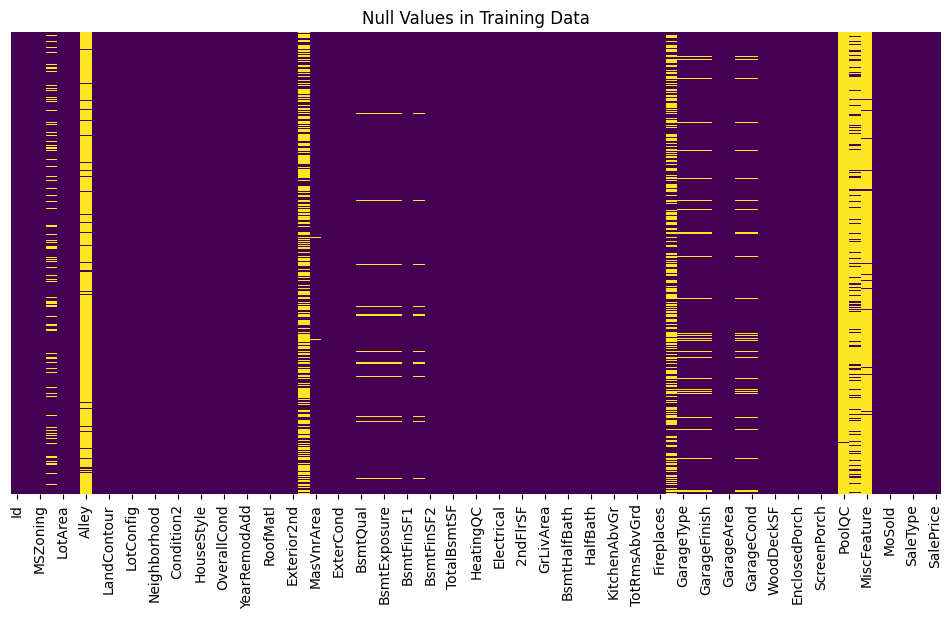

In [12]:
def plot_null_values(df, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title(f'Null Values in {title}')
    plt.show()

plot_null_values(train_data, "Training Data")

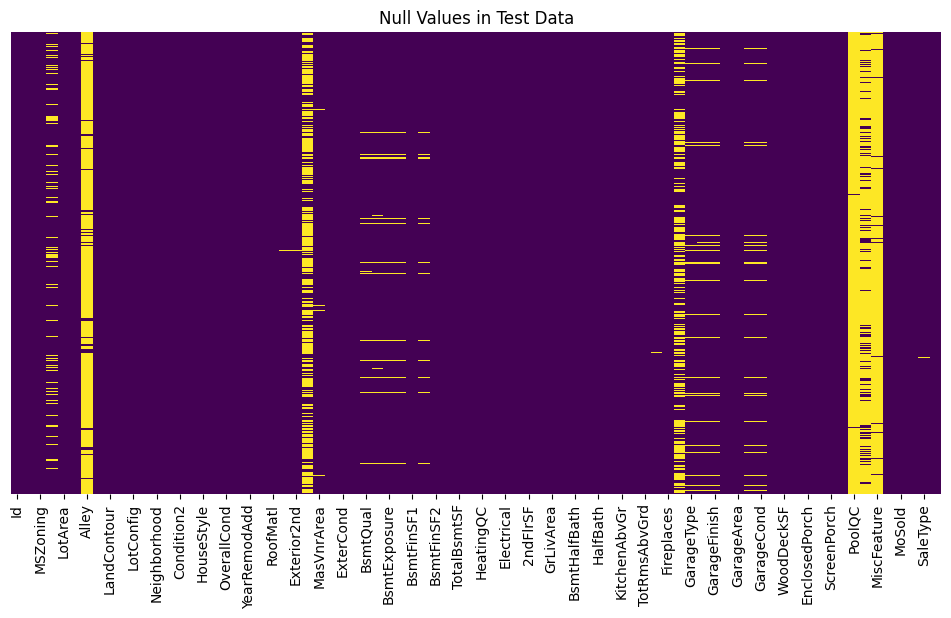

In [13]:
plot_null_values(test_data, "Test Data")

In [14]:
def handle_nulls(df):
    """Comprehensive null value treatment for housing data"""

    # 1. None-type columns
    none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'MasVnrType']
    df[none_cols] = df[none_cols].fillna('None')

    # 2. Numerical none equivalents
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['PoolArea'] = df['PoolArea'].fillna(0)
    df['GarageCars'] = df['GarageCars'].fillna(0)
    df['GarageArea'] = df['GarageArea'].fillna(0)

    # 3. Basement numericals
    bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                    'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
    df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

    # 4. Median imputation for numericals
    num_cols = ['LotFrontage', 'GarageYrBlt']
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # 5. Mode imputation for categoricals
    cat_cols = ['Electrical', 'MSZoning', 'Utilities', 'Exterior1st',
               'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df

# Apply to training data
train_data = handle_nulls(train_data)

# Verify
print("Null values after treatment:", train_data.isnull().sum().sum())

Null values after treatment: 0


In [15]:
def handle_test_nulls(test_df, train_df):
    """Handle nulls in test data using training data statistics"""

    # First apply standard treatment
    test_df = handle_nulls(test_df)

    # Additional columns specific to test data
    extra_cols = {
        # Columns where NA should be 'None'
        'object': ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
                  'KitchenQual', 'Functional', 'SaleType'],
        # Columns where NA should be 0
        'numeric': ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
    }

    # Handle extra columns
    for col in extra_cols['object']:
        if col in test_df.columns and test_df[col].isnull().any():
            test_df[col] = test_df[col].fillna('None')

    for col in extra_cols['numeric']:
        if col in test_df.columns and test_df[col].isnull().any():
            test_df[col] = test_df[col].fillna(0)

    # Special cases using training data stats
    if 'LotFrontage' in test_df.columns:
        train_median = train_df['LotFrontage'].median()
        test_df['LotFrontage'] = test_df['LotFrontage'].fillna(train_median)

    if 'GarageYrBlt' in test_df.columns:
        test_df['GarageYrBlt'] = test_df.apply(
            lambda row: row['YearBuilt'] if pd.isna(row['GarageYrBlt']) and row['GarageType'] == 'None'
            else row['GarageYrBlt'], axis=1
        )
        train_median = train_df['GarageYrBlt'].median()
        test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(train_median)

    # Final cleanup of any remaining nulls
    for col in test_df.columns:
        if test_df[col].isnull().any():
            if test_df[col].dtype == 'object':
                test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
            else:
                test_df[col] = test_df[col].fillna(test_df[col].median())

    return test_df

# Apply to test data
test_data = handle_test_nulls(test_data, train_data)

# Final verification
print("Remaining nulls in test data:", test_data.isnull().sum().sum())

Remaining nulls in test data: 0


<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19

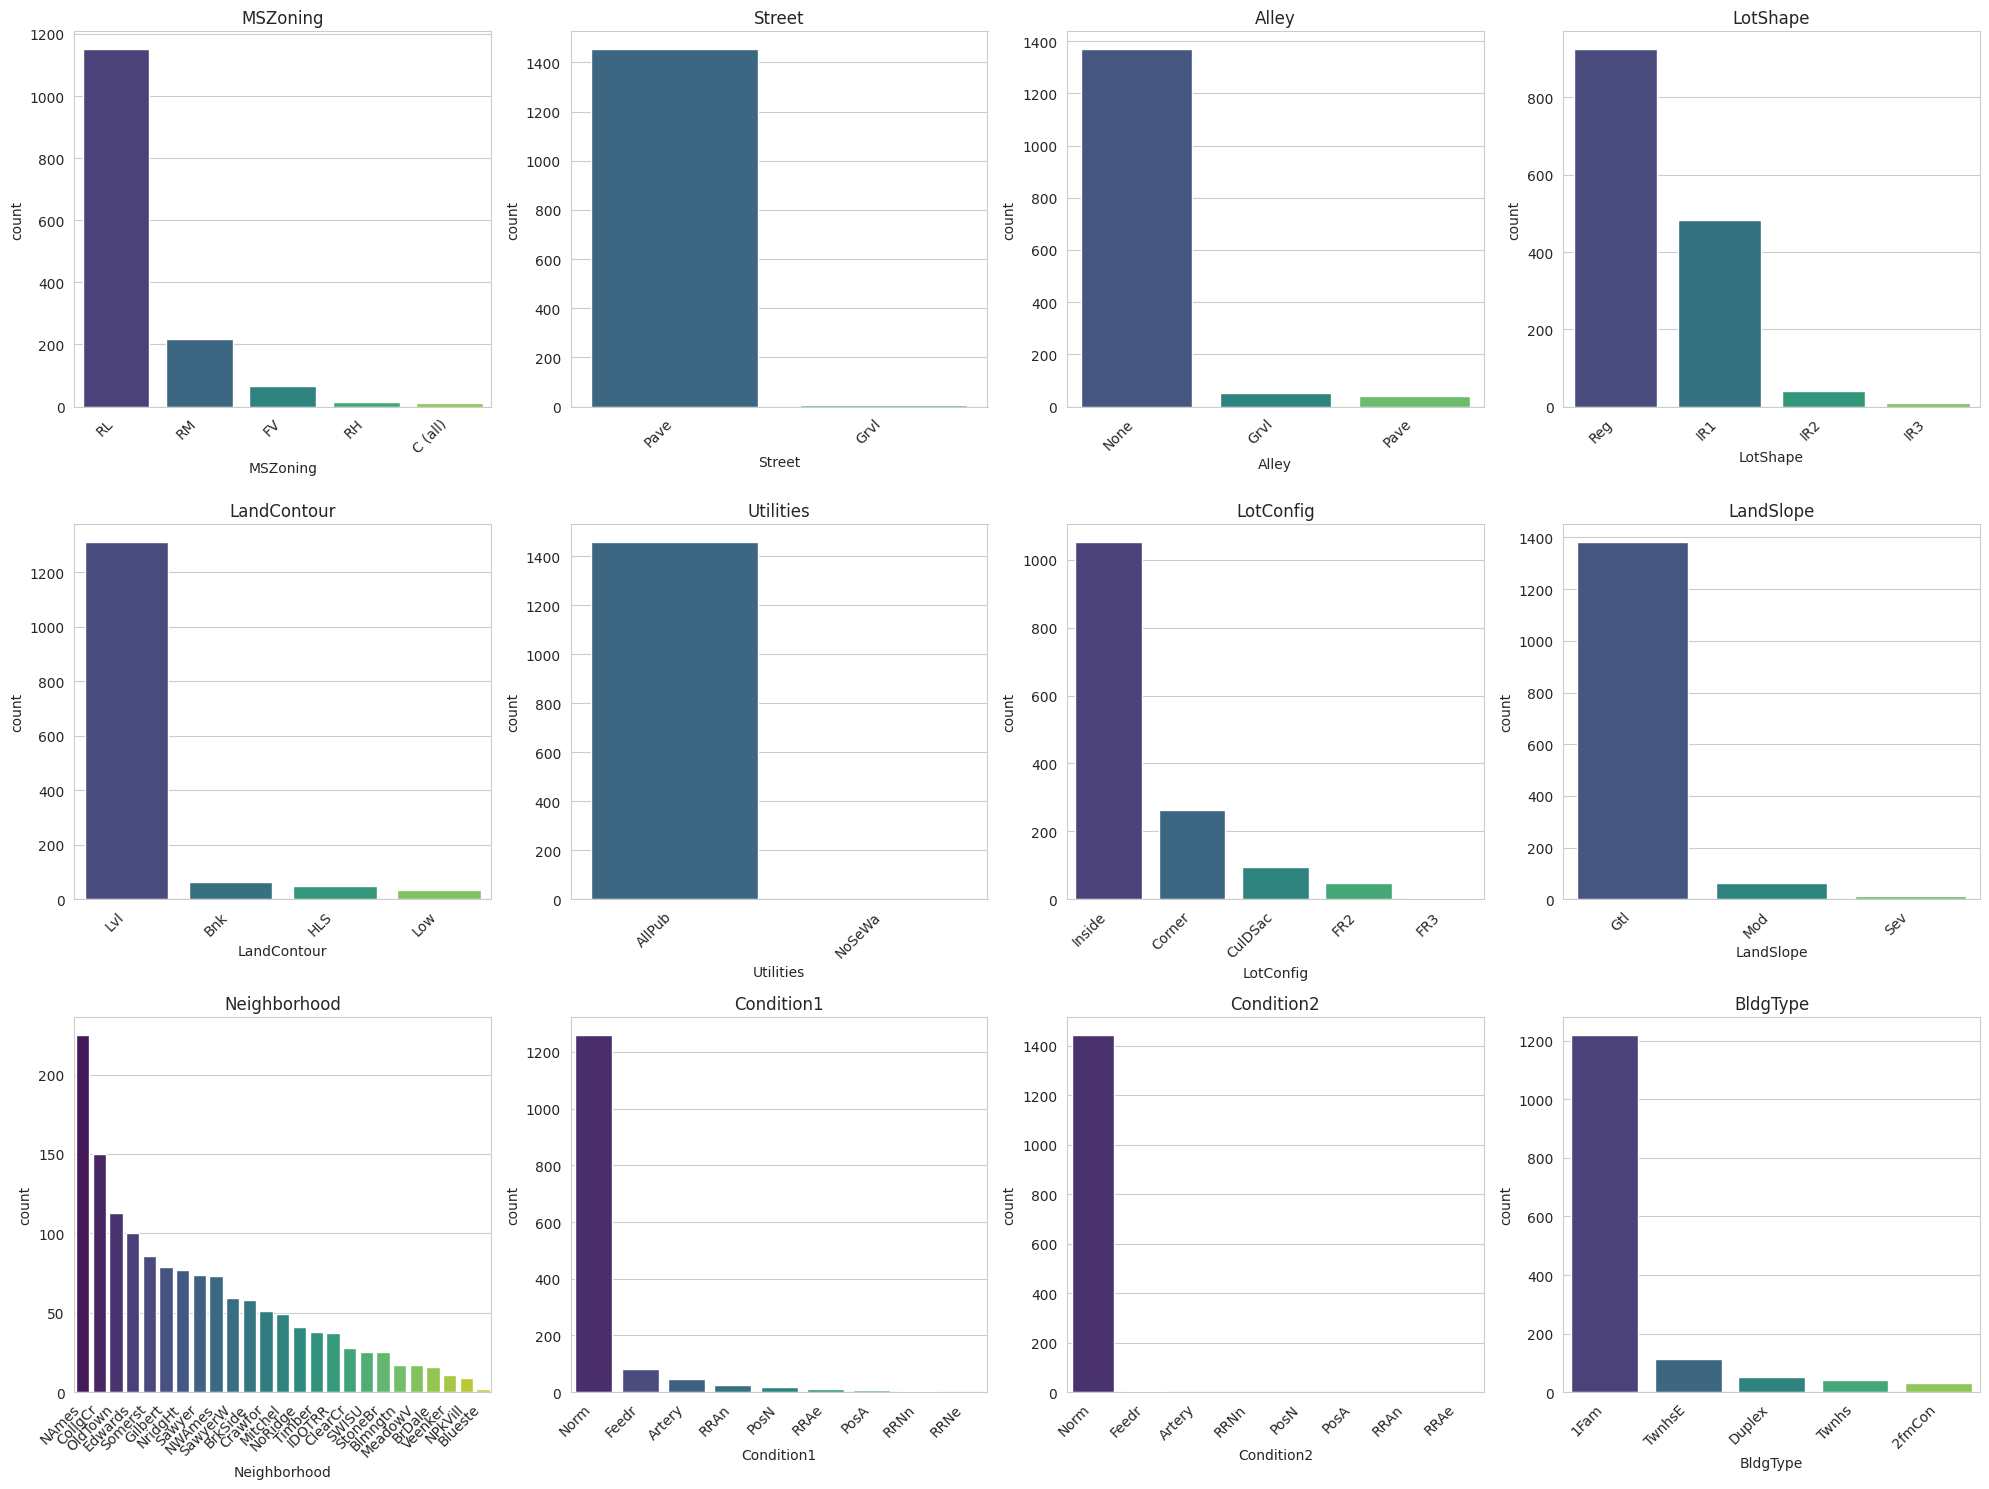

<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19

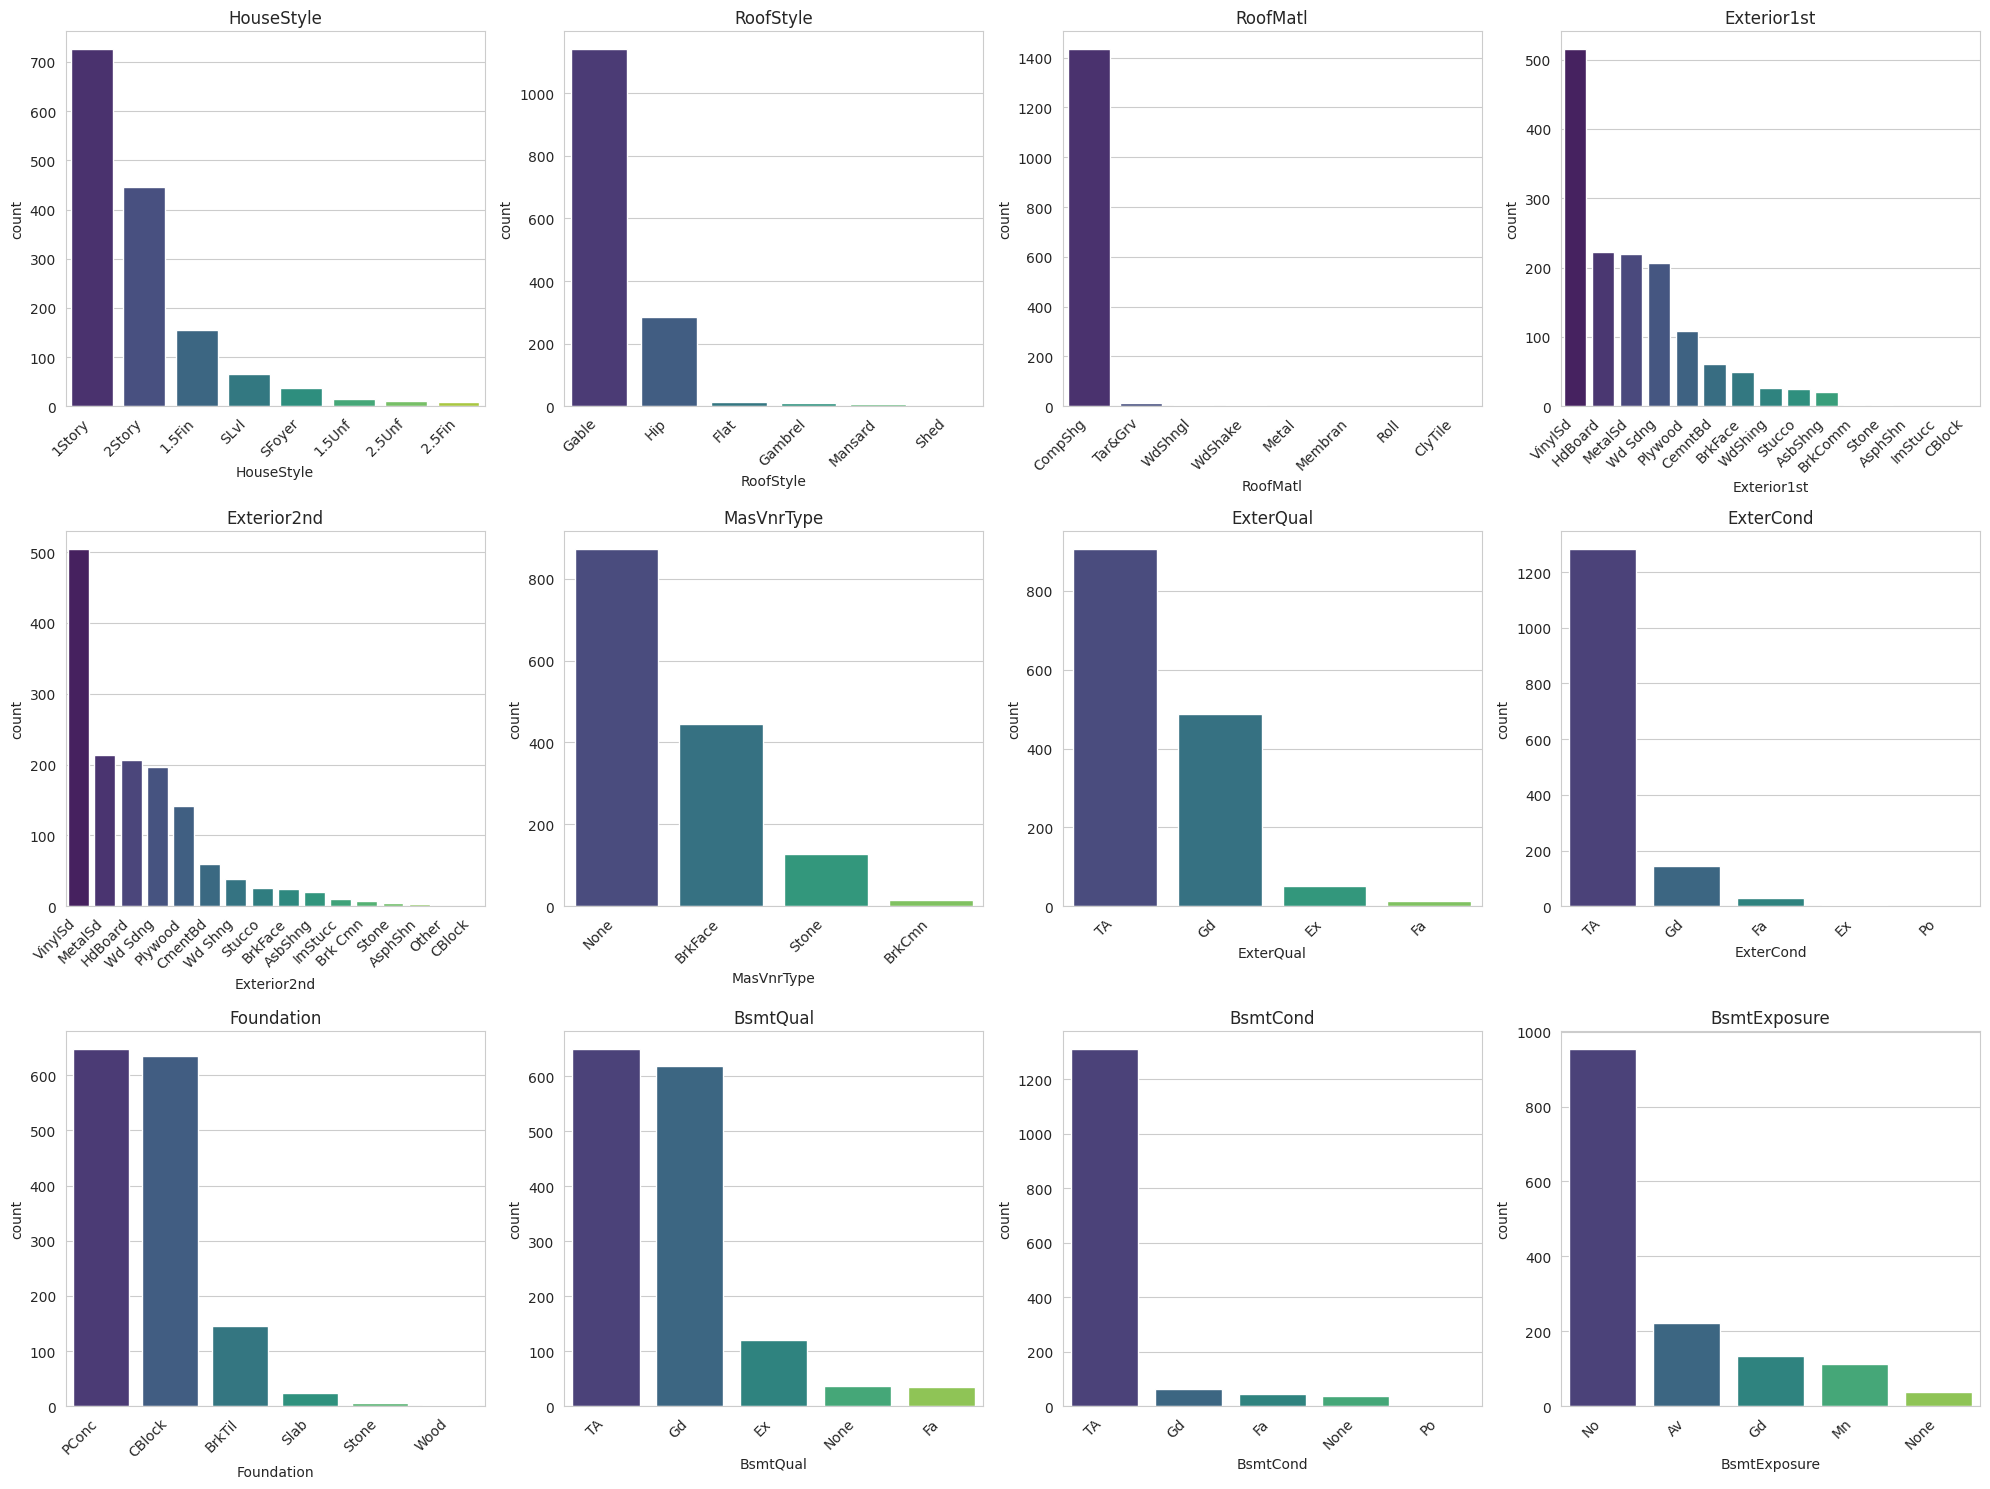

<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19

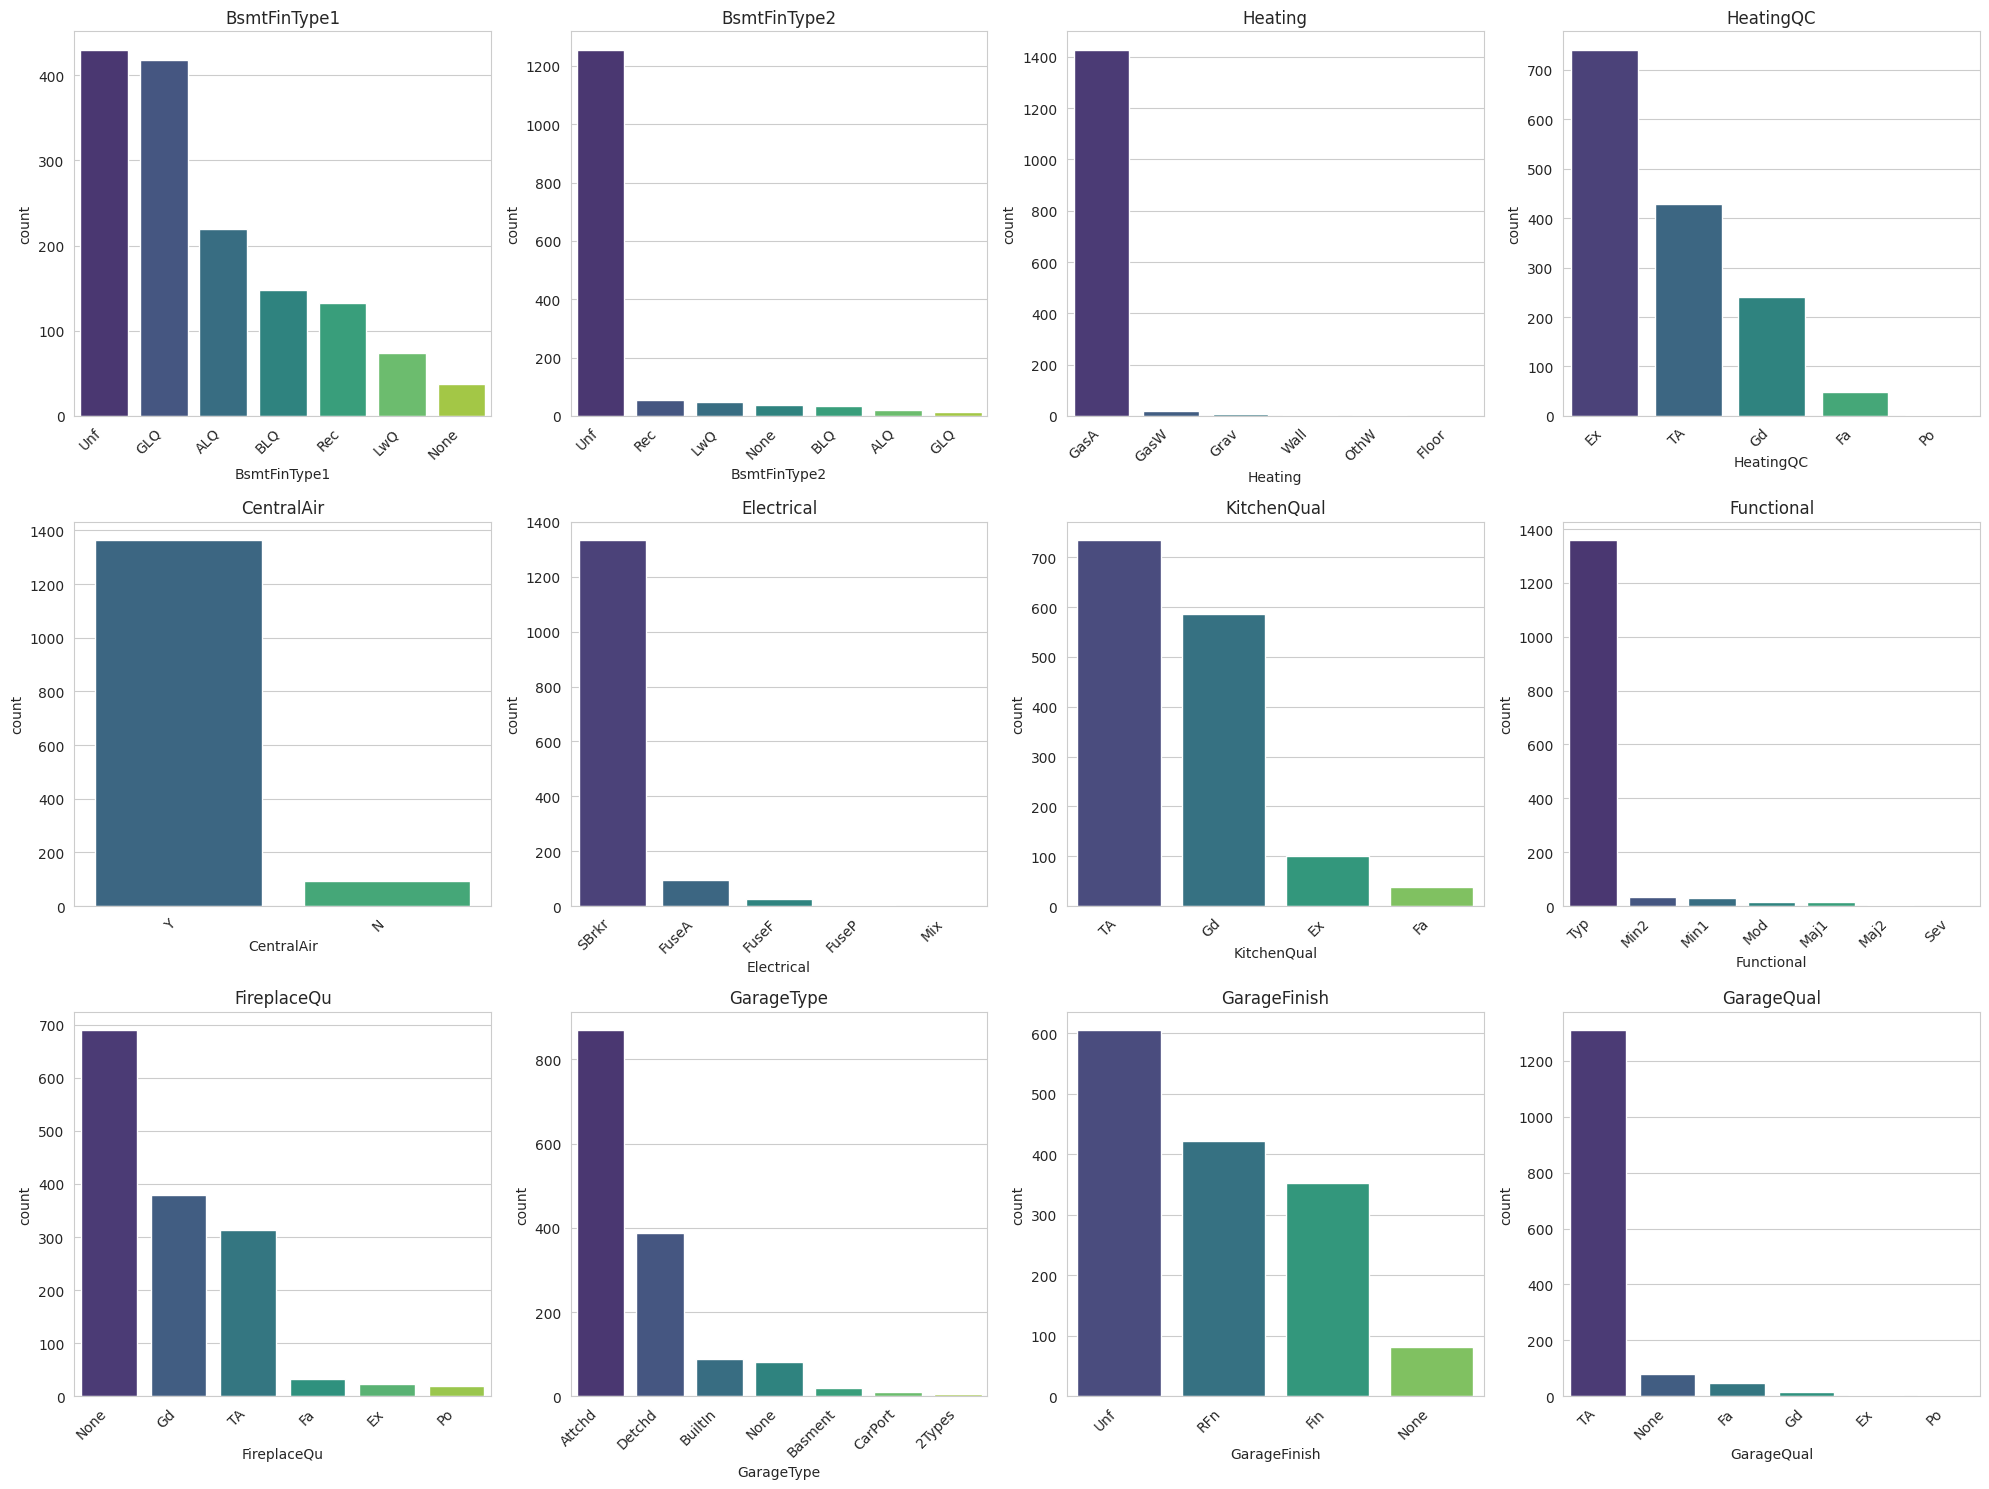

<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
<ipython-input-16-5b425ae44cac>:19

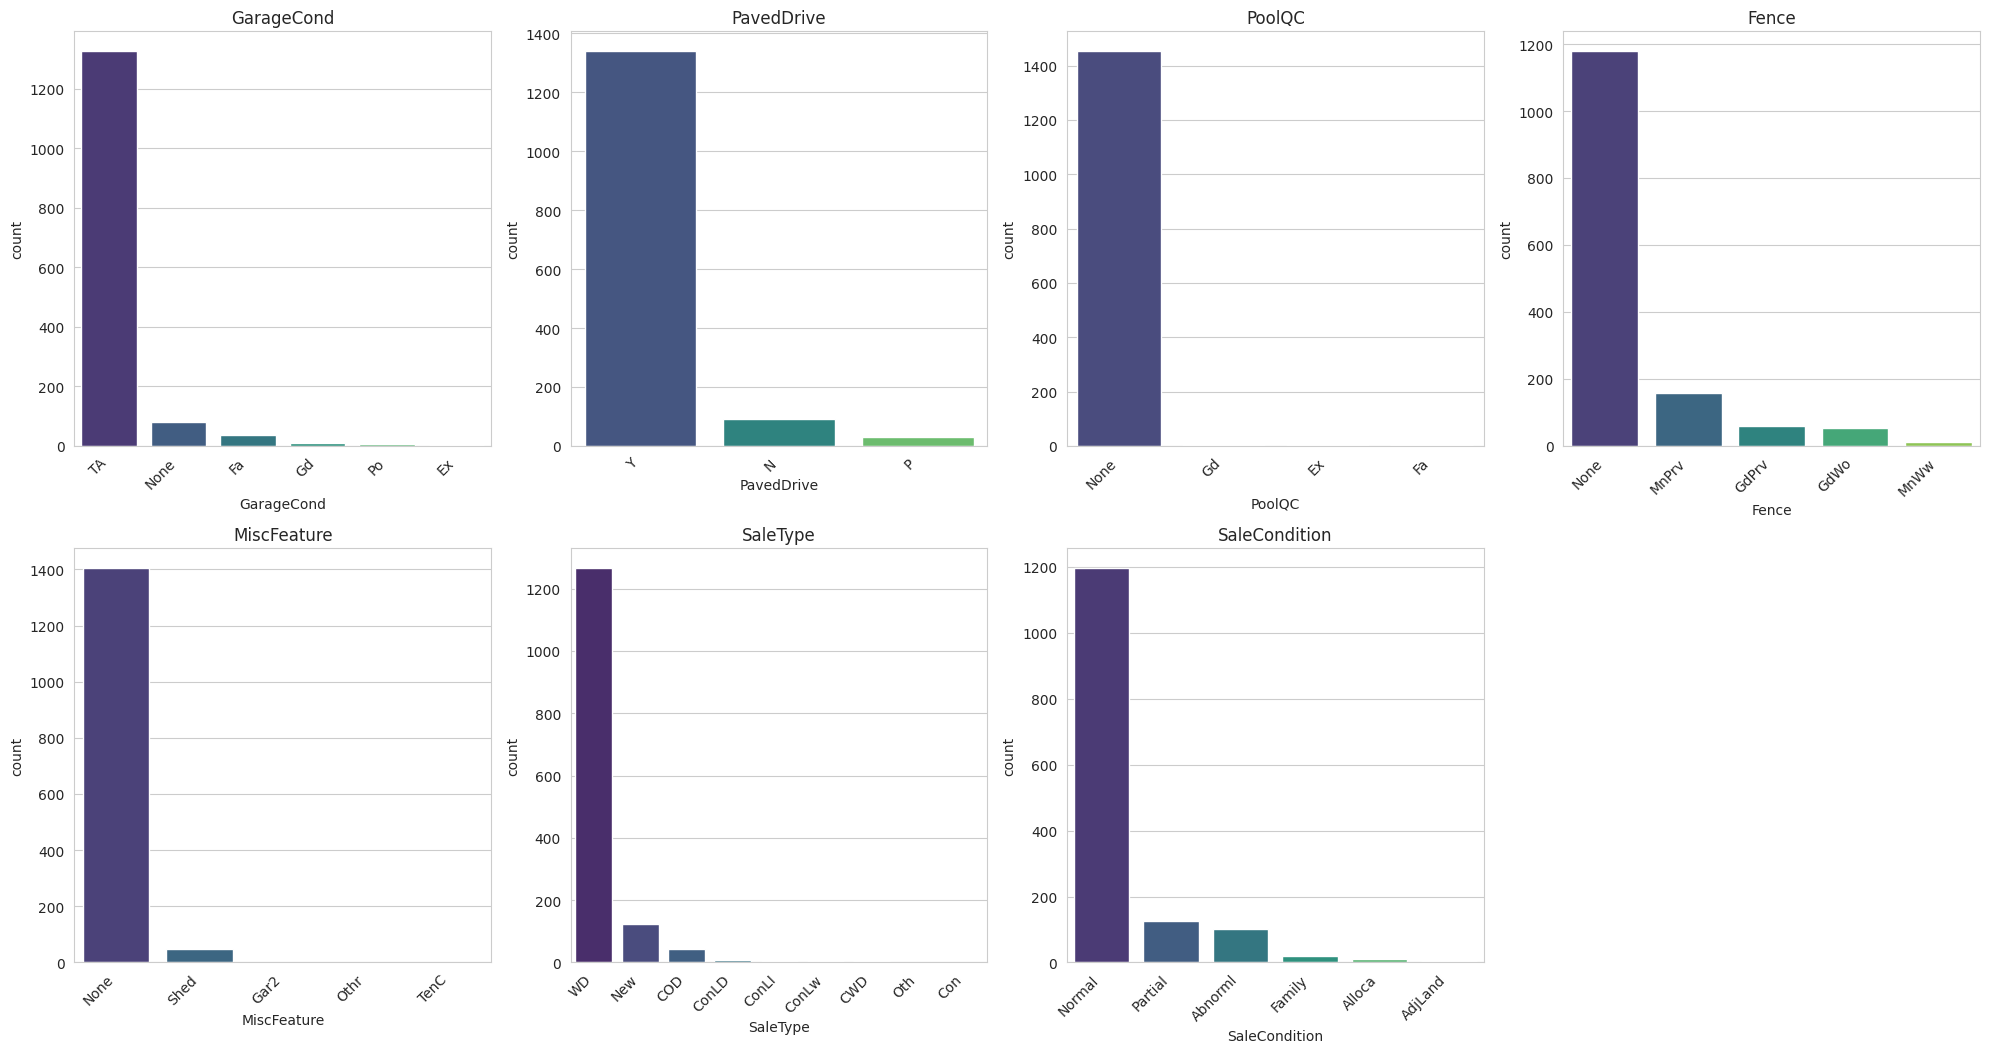

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 1. Categorical Features Visualization (split into multiple figures)
cat_cols = train_data.select_dtypes(include=['object', 'category']).columns
num_cat = len(cat_cols)
cols_per_fig = 12  # Show 12 features per figure

for i in range(0, num_cat, cols_per_fig):
    plt.figure(figsize=(20, 15))
    current_cols = cat_cols[i:i+cols_per_fig]
    for j, col in enumerate(current_cols, 1):
        plt.subplot(3, 4, j)  # 3x4 grid per figure
        sns.countplot(data=train_data, x=col, palette='viridis', order=train_data[col].value_counts().index)
        plt.title(f'{col}', fontsize=12)
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

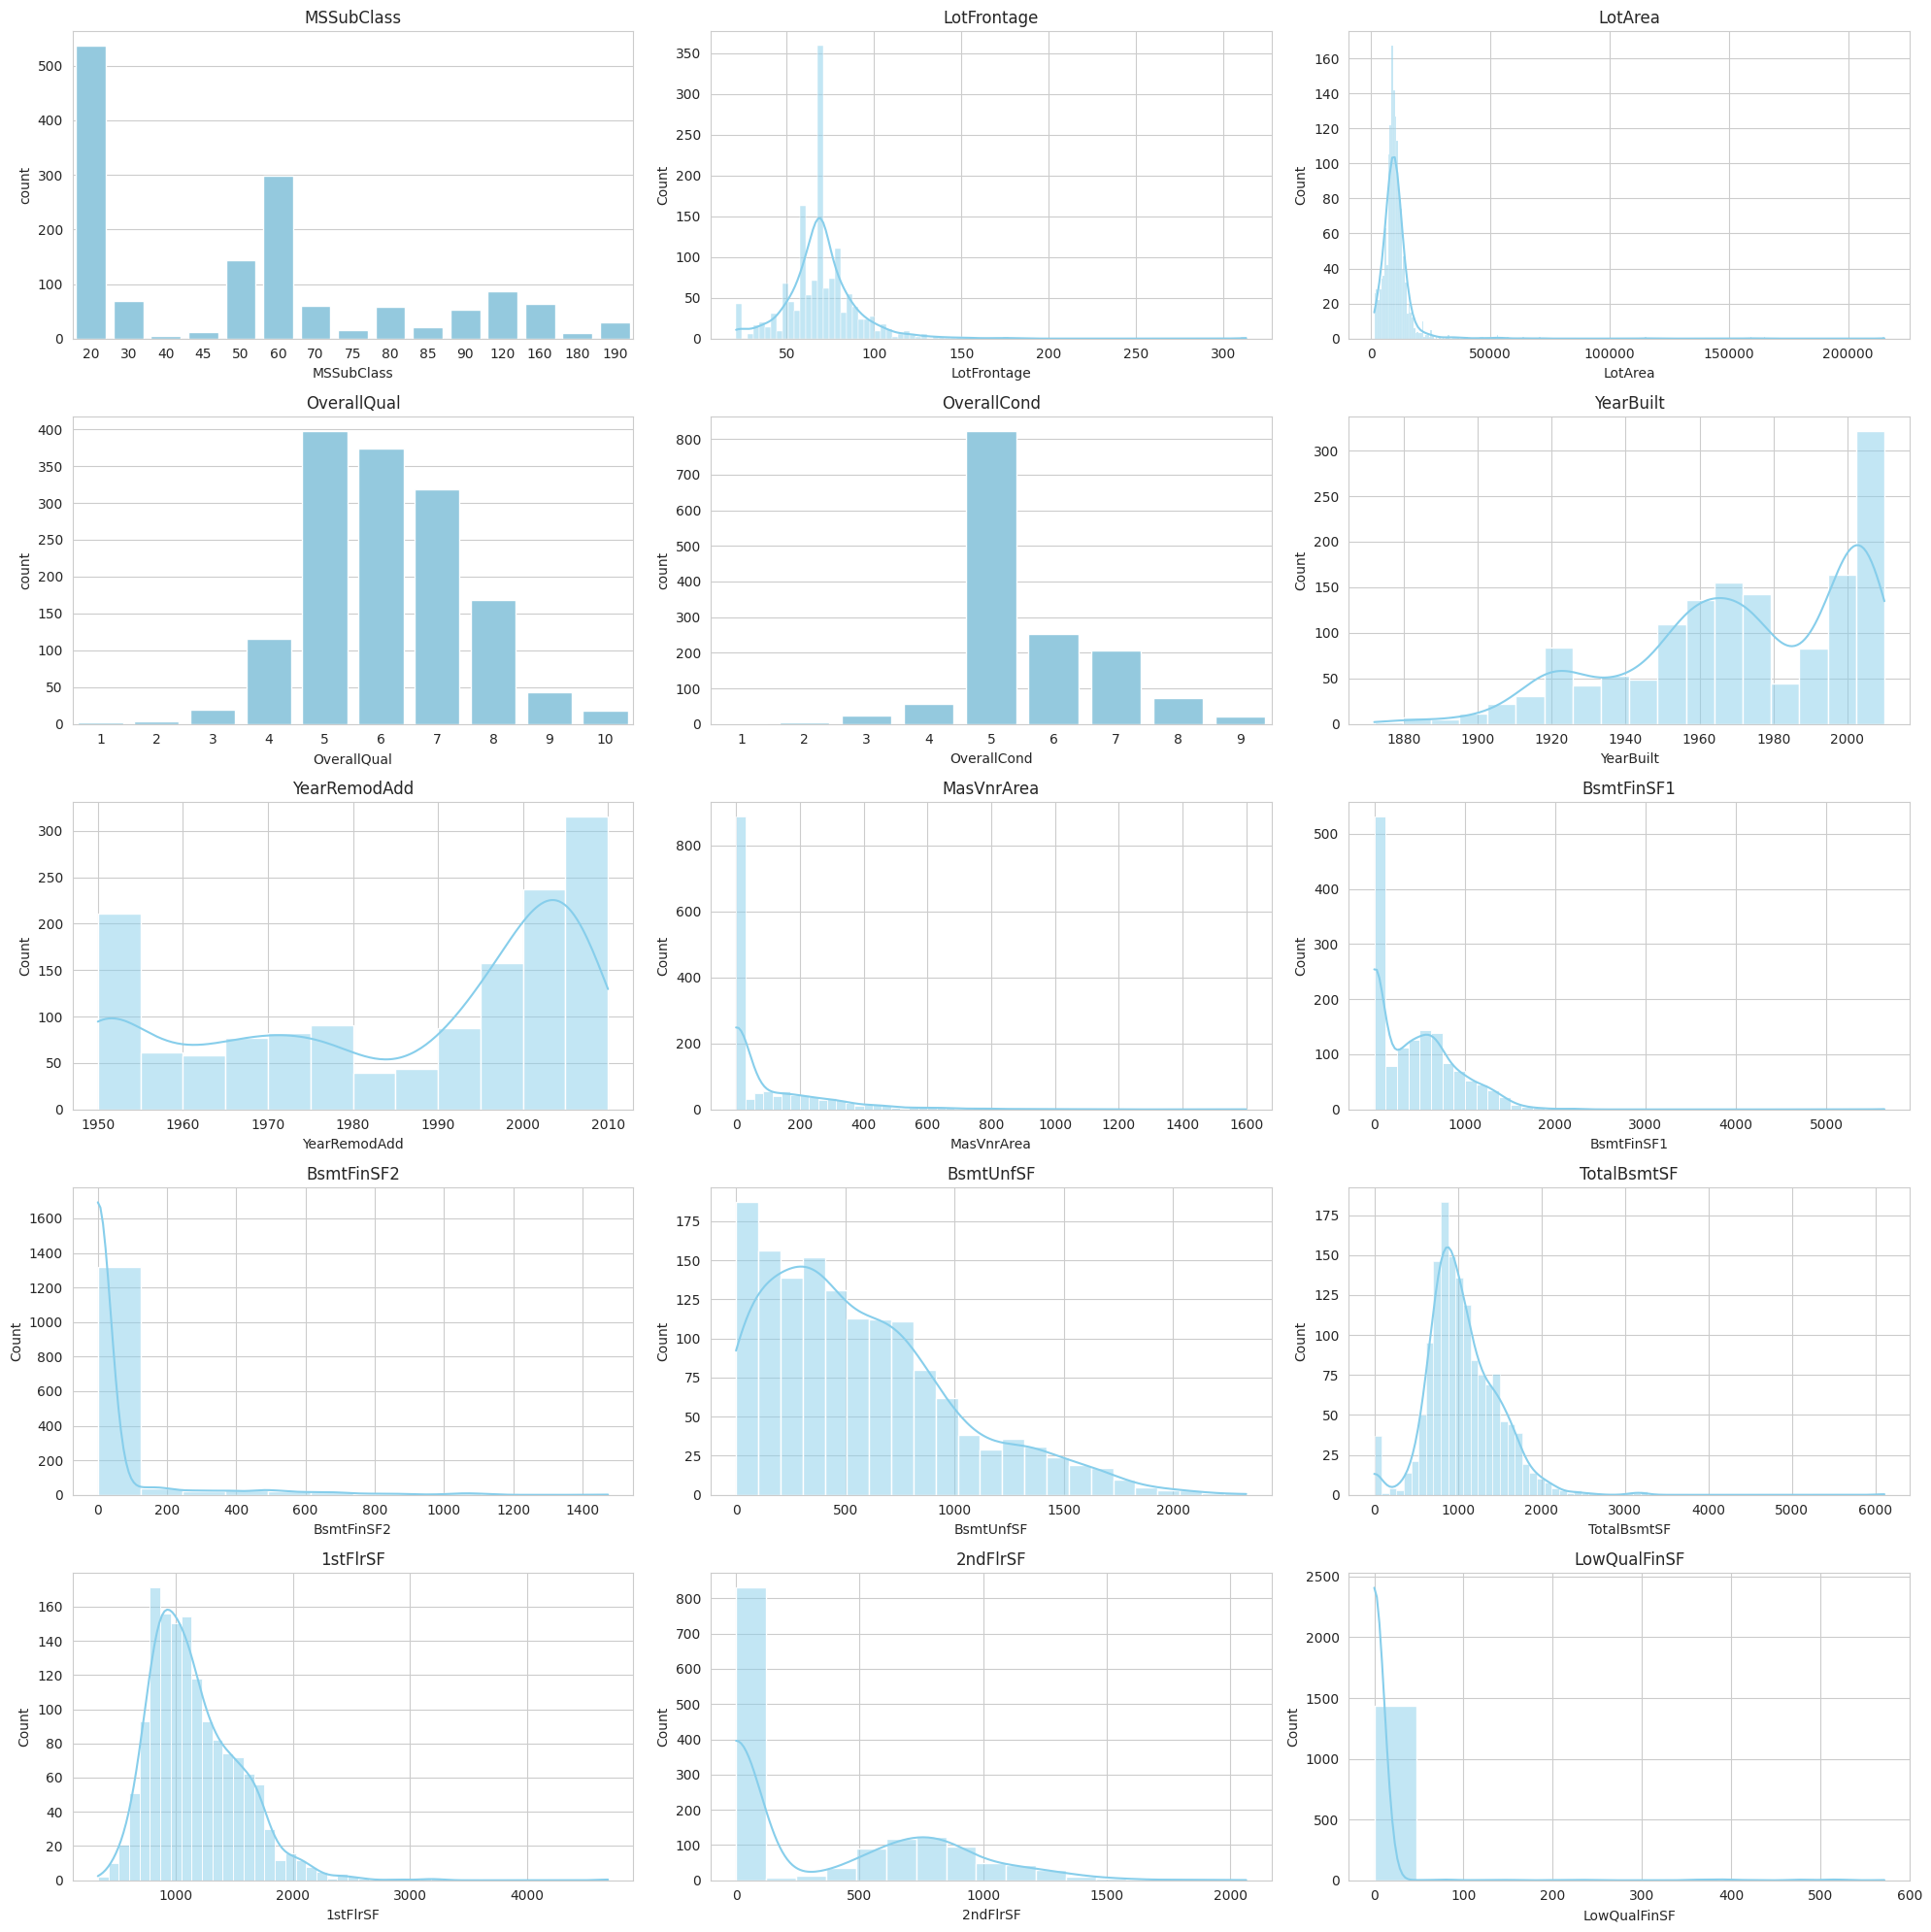

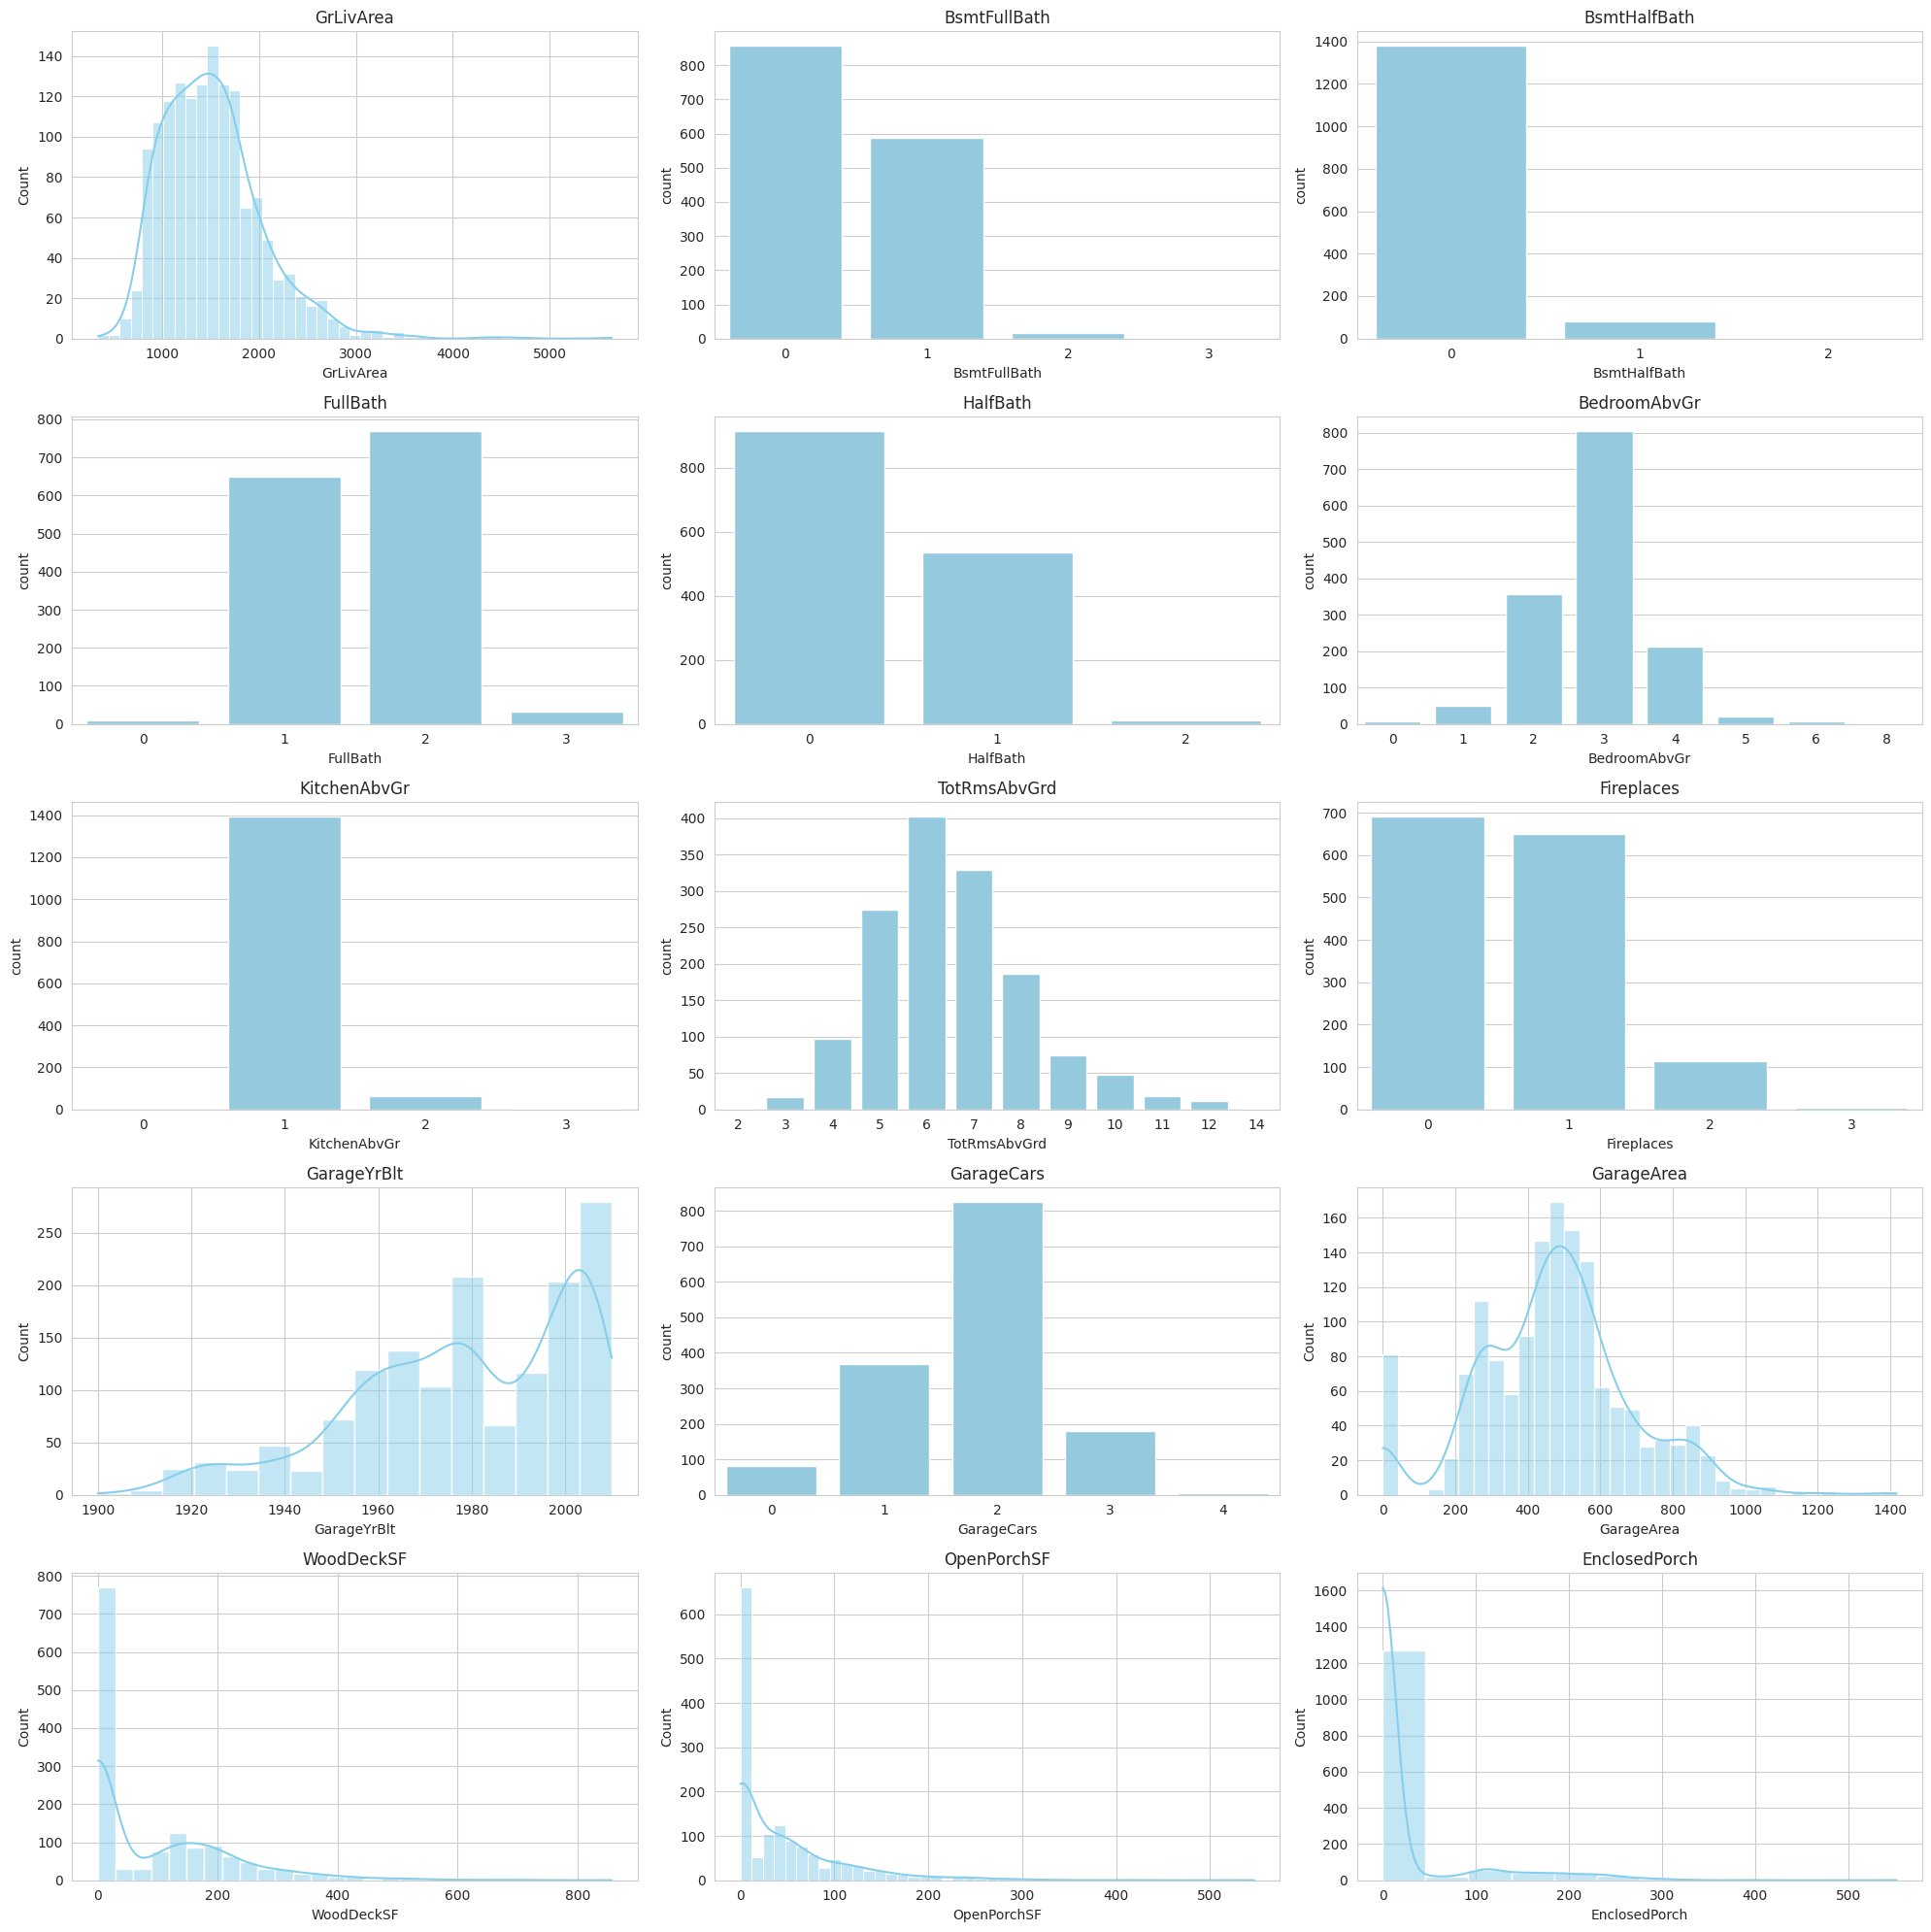

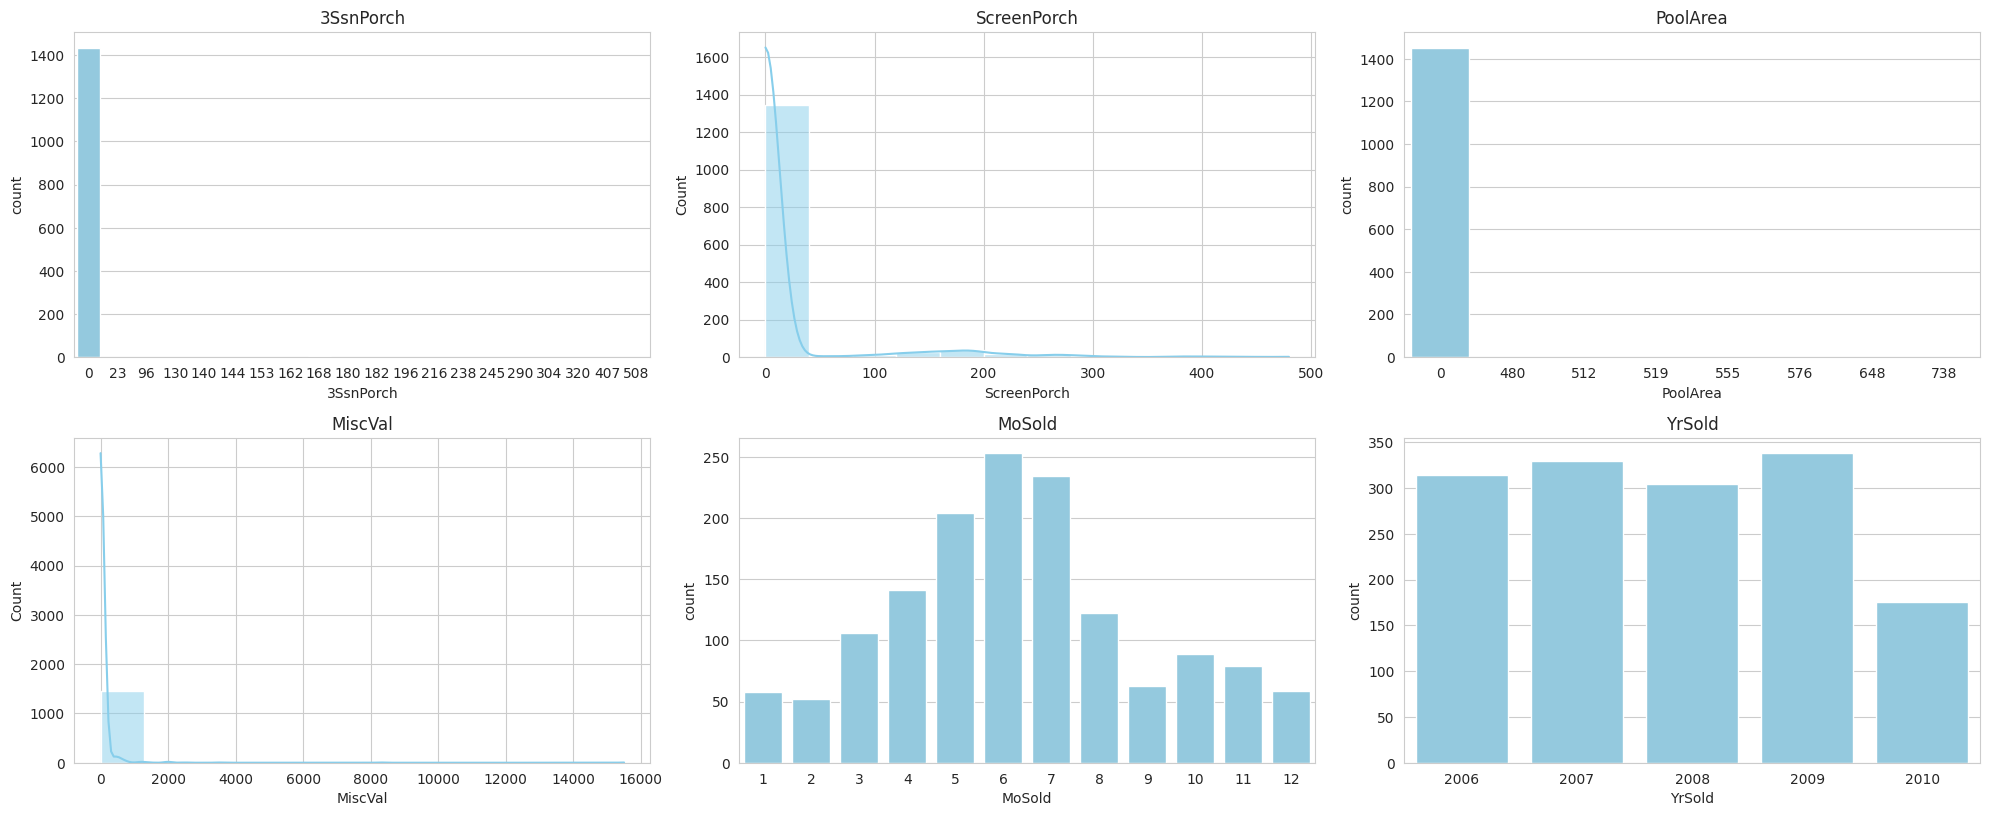

In [17]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['Id', 'SalePrice']]
cols_per_fig = 15  # Show 15 features per figure

for i in range(0, len(num_cols), cols_per_fig):
    plt.figure(figsize=(20, 20))
    current_cols = num_cols[i:i+cols_per_fig]
    for j, col in enumerate(current_cols, 1):
        plt.subplot(5, 3, j)  # 5x3 grid per figure
        if train_data[col].nunique() > 20:  # Use histogram for high-cardinality
            sns.histplot(data=train_data, x=col, kde=True, color='skyblue')
        else:  # Use countplot for low-cardinality numerical
            sns.countplot(data=train_data, x=col, color='skyblue')
        plt.title(f'{col}', fontsize=12)
    plt.tight_layout()
    plt.show()

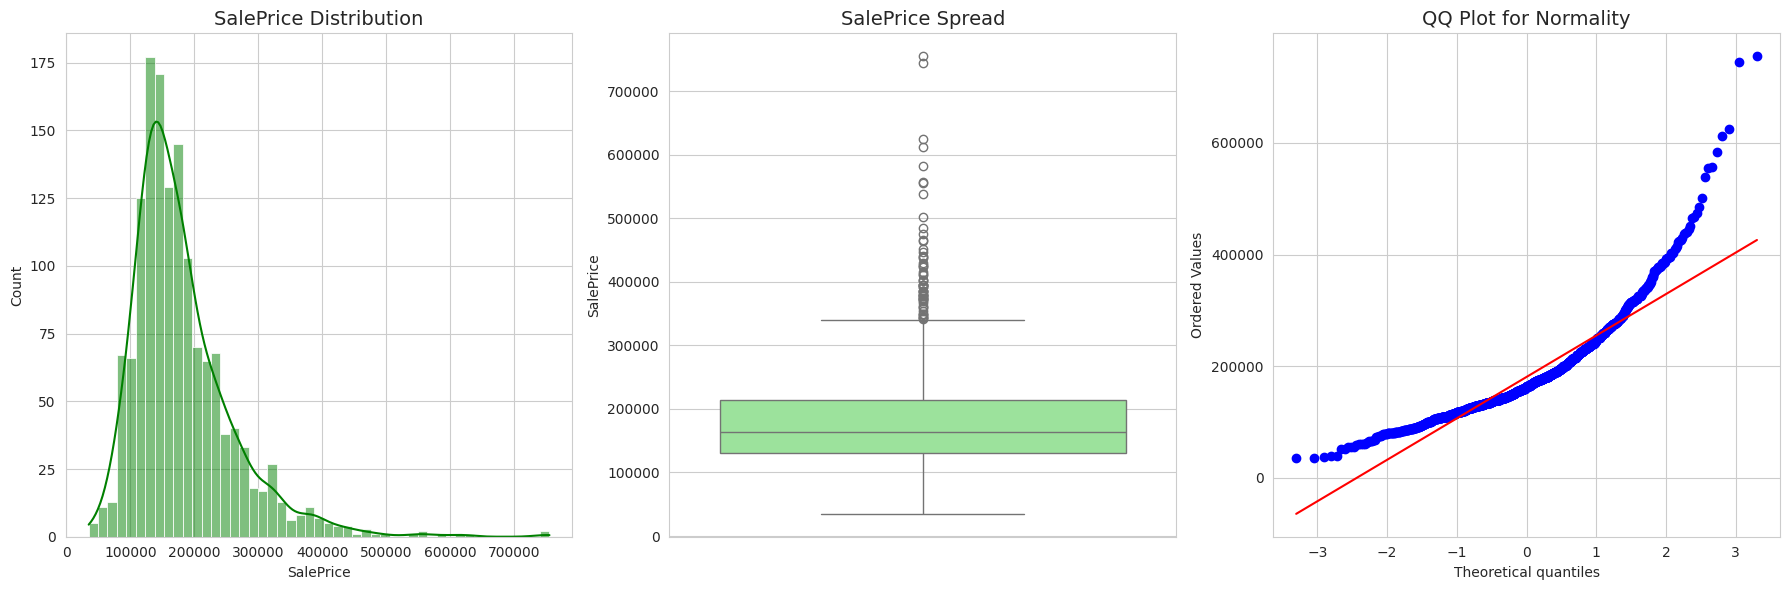

In [18]:
plt.figure(figsize=(18, 6))

# Distribution plot
plt.subplot(1, 3, 1)
sns.histplot(train_data['SalePrice'], kde=True, color='green')
plt.title('SalePrice Distribution', fontsize=14)

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=train_data['SalePrice'], color='lightgreen')
plt.title('SalePrice Spread', fontsize=14)

# QQ plot (for normality check)
plt.subplot(1, 3, 3)
import scipy.stats as stats
stats.probplot(train_data['SalePrice'], plot=plt)
plt.title('QQ Plot for Normality', fontsize=14)

plt.tight_layout()
plt.show()

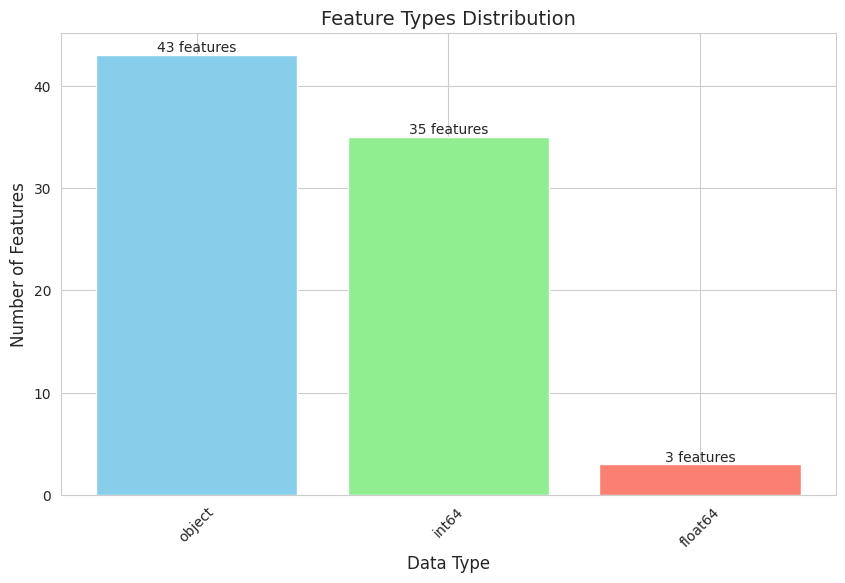

In [19]:
# Get data types and convert to string
dtypes = train_data.dtypes.astype(str)

# Count by type
dtype_counts = dtypes.value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dtype_counts.index, dtype_counts.values, color=['skyblue', 'lightgreen', 'salmon'])

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} features',
             ha='center', va='bottom')

plt.title('Feature Types Distribution', fontsize=14)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.xticks(rotation=45)
plt.show()

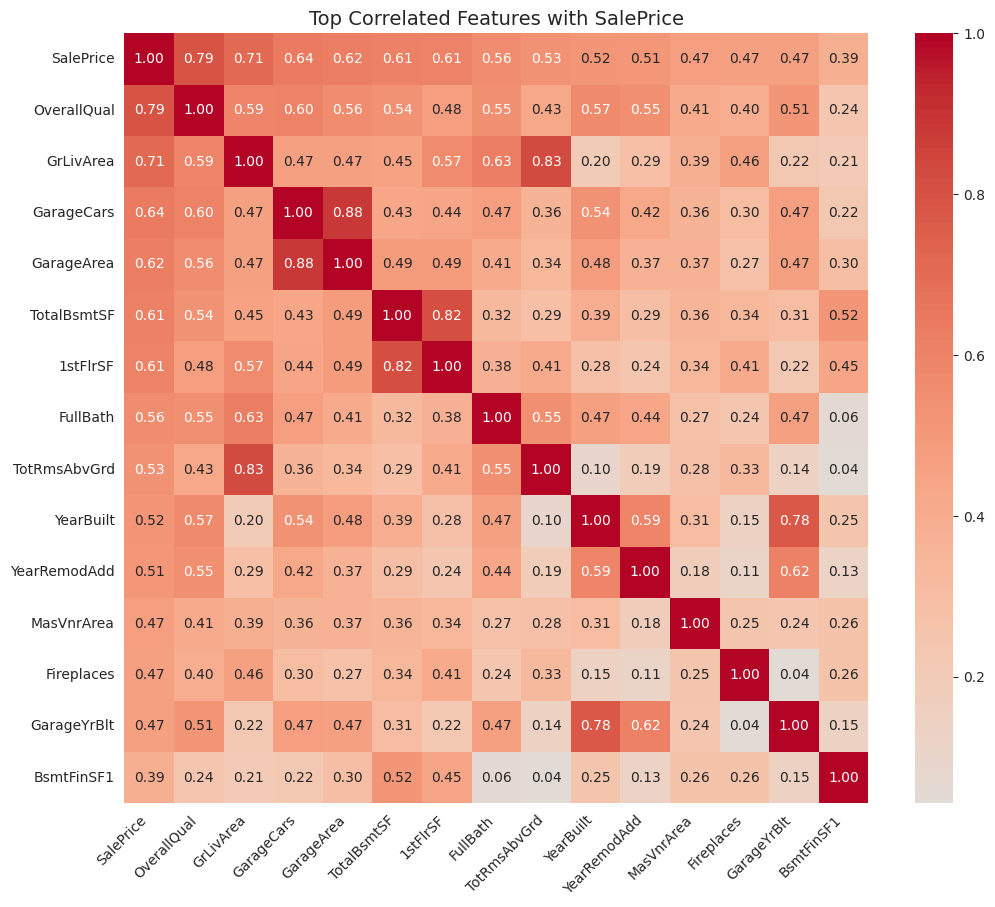

In [20]:
# Calculate correlation and select top features
corr_matrix = train_data[num_cols + ['SalePrice']].corr()
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).index[:15]

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_corr, top_corr],
            annot=True, fmt=".2f",
            cmap='coolwarm',
            center=0,
            annot_kws={"size": 10})
plt.title('Top Correlated Features with SalePrice', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#Feature Engineering

#1. Temporal Features

In [21]:
# Age of house when sold
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']

# Years since remodel
train_data['RemodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['RemodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']

# Is remodeled? (1 if yes, 0 if no)
train_data['IsRemodeled'] = (train_data['YearBuilt'] != train_data['YearRemodAdd']).astype(int)
test_data['IsRemodeled'] = (test_data['YearBuilt'] != test_data['YearRemodAdd']).astype(int)

#2. Space Utilization Features

In [22]:
# Total square footage
train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']
test_data['TotalSF'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] + test_data['TotalBsmtSF']

# Living area ratio
train_data['LivingAreaRatio'] = train_data['GrLivArea'] / train_data['TotalSF']
test_data['LivingAreaRatio'] = test_data['GrLivArea'] / test_data['TotalSF']

# Lot coverage ratio
train_data['LotCoverage'] = train_data['1stFlrSF'] / train_data['LotArea']
test_data['LotCoverage'] = test_data['1stFlrSF'] / test_data['LotArea']

#3. Bathroom Features

In [23]:
import numpy as np

# Total bathrooms
train_data['TotalBath'] = (train_data['FullBath'] +
                          (0.5 * train_data['HalfBath']) +
                          train_data['BsmtFullBath'] +
                          (0.5 * train_data['BsmtHalfBath']))

test_data['TotalBath'] = (test_data['FullBath'] +
                         (0.5 * test_data['HalfBath']) +
                         test_data['BsmtFullBath'] +
                         (0.5 * test_data['BsmtHalfBath']))

# Bathroom to bedroom ratio
train_data['BathBedRatio'] = train_data['TotalBath'] / train_data['BedroomAbvGr']
test_data['BathBedRatio'] = test_data['TotalBath'] / test_data['BedroomAbvGr']

# Handle division by zero
train_data['BathBedRatio'] = train_data['BathBedRatio'].replace(np.inf, 0)
test_data['BathBedRatio'] = test_data['BathBedRatio'].replace(np.inf, 0)

#4. Quality & Condition Features

In [24]:
# Overall quality squared (captures non-linear effects)
train_data['OverallQualSq'] = train_data['OverallQual'] ** 2
test_data['OverallQualSq'] = test_data['OverallQual'] ** 2

# Quality minus condition (potential value adder)
train_data['QualCondDiff'] = train_data['OverallQual'] - train_data['OverallCond']
test_data['QualCondDiff'] = test_data['OverallQual'] - test_data['OverallCond']

# Kitchen quality weighted by number of kitchens
train_data['KitchenScore'] = train_data['KitchenQual'] * train_data['KitchenAbvGr']
test_data['KitchenScore'] = test_data['KitchenQual'] * test_data['KitchenAbvGr']

#5. External Features

In [25]:
# Total porch area
train_data['TotalPorchSF'] = (train_data['OpenPorchSF'] +
                             train_data['EnclosedPorch'] +
                             train_data['3SsnPorch'] +
                             train_data['ScreenPorch'])

test_data['TotalPorchSF'] = (test_data['OpenPorchSF'] +
                            test_data['EnclosedPorch'] +
                            test_data['3SsnPorch'] +
                            test_data['ScreenPorch'])

# Has pool? (binary)
train_data['HasPool'] = train_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasPool'] = test_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Has garage? (binary)
train_data['HasGarage'] = train_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_data['HasGarage'] = test_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

#6. Interaction Features

In [26]:
# Quality * Square Footage
train_data['QualXSF'] = train_data['OverallQual'] * train_data['TotalSF']
test_data['QualXSF'] = test_data['OverallQual'] * test_data['TotalSF']

# Bathrooms * Bedrooms
train_data['BathXBed'] = train_data['TotalBath'] * train_data['BedroomAbvGr']
test_data['BathXBed'] = test_data['TotalBath'] * test_data['BedroomAbvGr']

#Advanced Neighborhood Features

#Neighborhood Price Tiers

In [27]:
# 1. Find median price per neighborhood (using original encoded columns)
neighborhood_cols = [col for col in train_data.columns if 'Neighborhood_' in col]
neighborhood_medians = {}

for col in neighborhood_cols:
    mask = train_data[col] == 1
    neighborhood_medians[col] = train_data[mask]['SalePrice'].median()

# 2. Classify neighborhoods into tiers
sorted_neighborhoods = sorted(neighborhood_medians.items(), key=lambda x: x[1])
tier_size = len(sorted_neighborhoods) // 3  # 3 tiers (low/mid/high)

low_tier = [nb[0] for nb in sorted_neighborhoods[:tier_size]]
mid_tier = [nb[0] for nb in sorted_neighborhoods[tier_size:2*tier_size]]
high_tier = [nb[0] for nb in sorted_neighborhoods[2*tier_size:]]

# 3. Create new features
train_data['NeighborhoodTier'] = 0  # Default: low tier
test_data['NeighborhoodTier'] = 0

for col in neighborhood_cols:
    if col in high_tier:
        train_data.loc[train_data[col]==1, 'NeighborhoodTier'] = 2
        test_data.loc[test_data[col]==1, 'NeighborhoodTier'] = 2
    elif col in mid_tier:
        train_data.loc[train_data[col]==1, 'NeighborhoodTier'] = 1
        test_data.loc[test_data[col]==1, 'NeighborhoodTier'] = 1

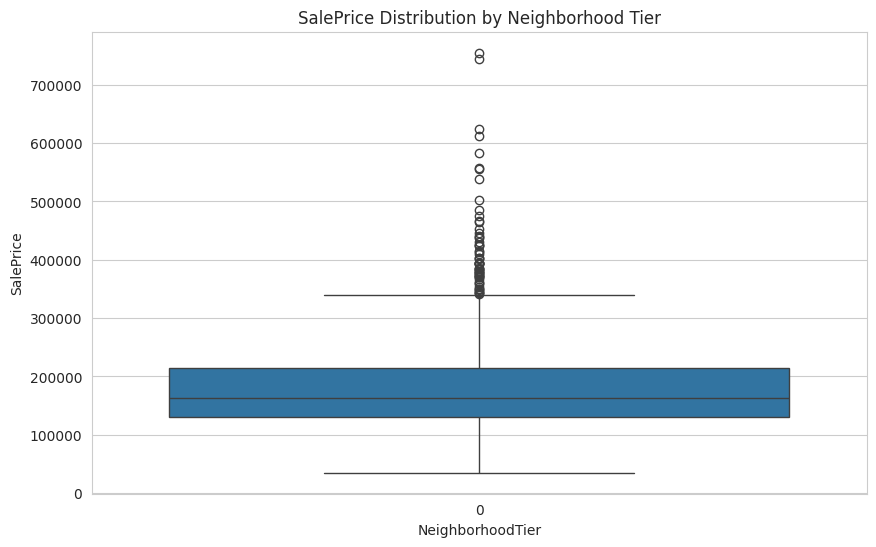

In [28]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='NeighborhoodTier', y='SalePrice')
plt.title('SalePrice Distribution by Neighborhood Tier')
plt.show()

#Train Model

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber  # Correct import for Huber loss


# Target variable
y_train = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Ordinal encoding for quality features
quality_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
               'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

for col in ordinal_cols:
    train_data[col] = train_data[col].map(quality_map).fillna(0)  # Handle missing
    test_data[col] = test_data[col].map(quality_map).fillna(0)

# Label encoding for remaining categoricals
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    combined = pd.concat([train_data[col], test_data[col]], axis=0).astype(str)
    le.fit(combined)
    train_data[col] = le.transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))

# Feature engineering
for df in [train_data, test_data]:
    df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
    df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    df['AgeWhenSold'] = df['YrSold'] - df['YearBuilt']
    df['OverallGrade'] = df['OverallQual'] * df['OverallCond']

# Drop IDs and select features
X_train = train_data.drop('Id', axis=1)
X_test = test_data.drop('Id', axis=1)

# Log-transform target
y_train_log = np.log1p(y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.fillna(0))  # Fill any remaining NaNs
X_test_scaled = scaler.transform(X_test.fillna(0))

# Reshape for CNN
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


model = Sequential([
    Conv1D(64, 5, activation='relu', kernel_regularizer=l2(0.01),
           input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1)
])

# Correct Huber loss implementation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=Huber(),  # Properly initialized Huber loss
    metrics=['mae']
)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_cnn, y_train_log, test_size=0.2, random_state=42
)

callbacks = [
    EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-7)
]

history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 16.6694 - mae: 11.8116 - val_loss: 15.0771 - val_mae: 10.7394 - learning_rate: 0.0010
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 15.3266 - mae: 11.1194 - val_loss: 13.0096 - val_mae: 9.1554 - learning_rate: 0.0010
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 13.8503 - mae: 10.0869 - val_loss: 10.8187 - val_mae: 7.2969 - learning_rate: 0.0010
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 11.9430 - mae: 8.4793 - val_loss: 8.0632 - val_mae: 4.7428 - learning_rate: 0.0010
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.2857 - mae: 5.9859 - val_loss: 4.5425 - val_mae: 1.2544 - learning_rate: 0.0010
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.8425 - mae: 3.5978 - val_loss: 5.3396 - val_mae: 2.0773 - learning_rate: 0.0010
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.1942 - mae: 2.9432 - val_loss: 4.4447 - val_mae: 1.1989 - learning_rate: 0.

In [30]:
# Validation predictions
val_preds_log = model.predict(X_val_split).flatten()
val_preds = np.expm1(val_preds_log)
y_val_true = np.expm1(y_val_split)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val_true, val_preds))
mae = mean_absolute_error(y_val_true, val_preds)
r2 = r2_score(y_val_true, val_preds)

print(f"\nValidation Metrics:")
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R²: {r2:.3f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Validation Metrics:
RMSE: $42,948.65
MAE: $24,522.20
R²: 0.760


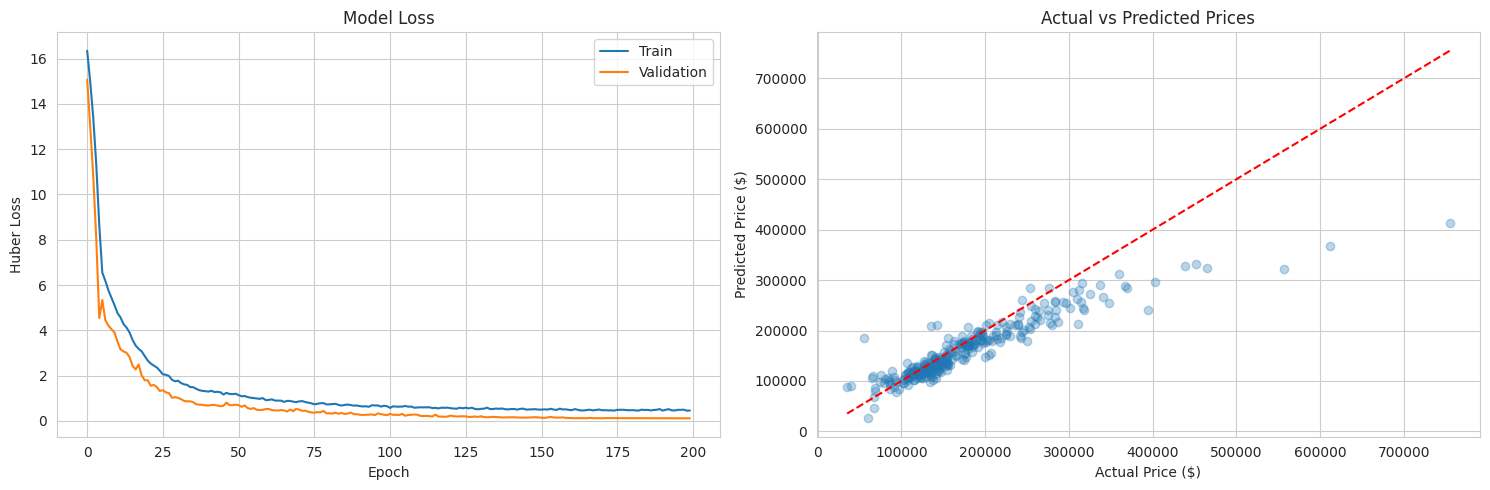

In [31]:
plt.figure(figsize=(15,5))

# Training history
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Huber Loss')
plt.xlabel('Epoch')
plt.legend()

# Prediction vs Actual
plt.subplot(1,2,2)
plt.scatter(y_val_true, val_preds, alpha=0.3)
plt.plot([y_val_true.min(), y_val_true.max()],
         [y_val_true.min(), y_val_true.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout()
plt.show()

In [32]:
test_preds_log = model.predict(X_test_cnn).flatten()
test_preds = np.expm1(test_preds_log)

submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})
submission.to_csv('cnn_predictions.csv', index=False)
print("\nTest predictions saved to cnn_predictions.csv")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Test predictions saved to cnn_predictions.csv
